<a href="https://colab.research.google.com/github/Abed221/IMDB-Recommendation-System/blob/main/IMDB_REC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
#Environment Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We didn't need the actor name dataset because we can use the nconst as a reference number through the principal and basics datasets and match these with each other

In [ ]:
!wget 'https://datasets.imdbws.com/title.basics.tsv.gz'
!wget 'https://datasets.imdbws.com/title.crew.tsv.gz'
!wget 'https://datasets.imdbws.com/title.ratings.tsv.gz'
!wget 'https://raw.githubusercontent.com/sahildit/IMDB-Movies-Extensive-Dataset-Analysis/master/data1/IMDb%20movies.csv'

In [11]:
!gunzip /content/title.basics.tsv.gz
!gunzip /content/title.crew.tsv.gz
!gunzip /content/title.ratings.tsv.gz

In [ ]:
principals = pd.read_csv('title.crew.tsv', sep='\t')
movies = pd.read_csv('title.basics.tsv', sep='\t')
ratings = pd.read_csv('title.ratings.tsv', sep='\t')
languages = pd.read_csv('IMDb movies.csv')

##Cleaning Data in the final dataframe

In [13]:
#Ratings
movies = pd.merge(movies, ratings, on=['tconst'])

#Directors
df2 = principals['directors']
movies = movies.join(df2)

#preparing languages dataframe for the merge
languages.rename(columns={'imdb_title_id': 'tconst'}, inplace=True)
movies = pd.merge(movies, languages, on=['tconst'])

In [8]:
#Fitering unwanted titletypes
movies.drop('primaryTitle', axis=1, inplace=True)
movies = movies[movies['titleType'] != 'tvPilot']
movies = movies[movies['titleType'] != 'videoGame']
movies = movies[movies['titleType'] != 'tvShort']
movies = movies[movies['titleType'] != 'video']
movies = movies[movies['titleType'] != 'tvEpisode']
movies = movies[movies['titleType'] != 'Short']

Drama                        63911
Documentary                  43932
Comedy                       42972
Drama,Short                  22201
Short                        20315
                             ...  
Biography,Comedy,Thriller        1
Adventure,Sci-Fi,Sport           1
Short,Sport,Western              1
Comedy,Crime,Game-Show           1
Documentary,Sport,Western        1
Name: genres, Length: 1934, dtype: int64

In [9]:
# Filtering irrelevant movies with awful rating/not released yet
movies = movies[movies['averageRating'] >= 2.0]
movies = movies[movies['numVotes'] >= 1000]
movies = movies[movies['startYear'] < 2022]

In [10]:
# Changing startyear dtype and incorrect values
movies['startYear'].replace(to_replace = r"\N", value= 2000, inplace=True)
movies['startYear'] = pd.to_numeric(movies['startYear'])

In [11]:
# Splitting Genres text values to multiple genre columns
new = movies["genres"].str.split(",", n=2 ,expand = True)
  
# making separate first name column from new data frame
movies["genre1"]= new[0]
movies["genre2"]= new[1]
movies["genre3"]= new[2]
  
# Dropping old Name columns
movies.drop(columns =["genres"], inplace = True)

##Checking the final dataframe

In [16]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short",5.9,191,nm0085156,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [ ]:
movies['genres'].value_counts()

\N     1815056
en           5
ja           1
da           1
yue          1
cmn          1
ca           1
Name: language, dtype: int64

#Movie name input

---



---



In [53]:
#Original title
title = input()

#Year of production
year = input()
year = int(year)

#ٍSepcify Title Type
titletype = movies[(movies['originalTitle']==title) & (movies['startYear']==year)]['titleType'].iloc[0]
#Movie genre
genre = movies[(movies['originalTitle'] == title) & (movies['startYear']==year)]['genre1'].iloc[0]

#Movie Director
director = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['directors'].iloc[0]

#Movie Average Rating
rating = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['averageRating'].iloc[0]

Kimi no na wa.
2016


In [54]:
print(genre)
print(director)
print(year)
print(titletype)

Animation
nm9505932
2016
movie


In [55]:
#output 1 (genre + better rating)
result = movies[(movies['genre1'] == genre) & (movies['titleType']==titletype) & (movies['averageRating']>=rating)]['originalTitle'].sample().iloc[0]
result2=0
#output 2 (genre + director)
if ((movies[(movies['directors'].str.contains(director, case=False)) & (movies['genre1']==genre) & (movies['titleType']==titletype)]['originalTitle'])).empty == False:
  result2 = movies.loc[(movies['directors']==director) & ((movies['genre1']==genre) | (movies['genre2']==genre) | (movies['genre3']==genre)) & (movies['titleType']==titletype)]['originalTitle'].sample().iloc[0]

#output 3 (genre + year)
res3 = movies[movies['startYear'].between(year-20, year+20)]
result3 = res3[(((res3['genre1'].str.contains(genre, case=False)) | (movies['genre2'].str.contains(genre, case=False)) | (movies['genre3'].str.contains(genre, case=False)))) & (movies['titleType']==titletype)]['originalTitle'].sample().iloc[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


#Final Output 

In [56]:
print(result)
print(result2)
print(result3)

Mushi-Shi Zoku Shou: Suzu no Shizuku
Kimi no na wa.
The Peanuts Movie


#ٌFuckup Region

In [29]:
movies[movies['originalTitle']==( "Kimi no na wa.")]

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,genre1,genre2,genre3
990917,tt5311514,movie,Kimi no na wa.,0,2016,\N,106,8.4,231854,nm9505932,Animation,Drama,Fantasy


In [ ]:
movies[movies['numVotes']== 0]

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,genre1,genre2,genre3


In [ ]:
movies.head()

AttributeError: ignored

In [ ]:
movies['numVotes'].isna().value_counts()

True     1357532
False     499935
Name: numVotes, dtype: int64

In [ ]:
movies['nu'].dropna(inplace=True)

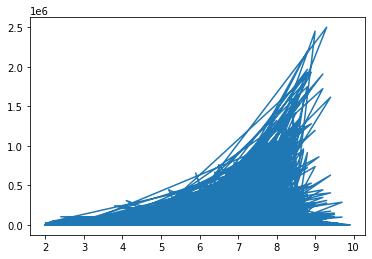

In [ ]:
plt.plot(movies['averageRating'], movies['numVotes'])

In [ ]:
movies['numVotes'].fillna(value= 0,inplace=True)
movies['numVotes'].replace(to_replace = '\n', value = 0)


0         1841
1          236
2         1603
3          153
4         2422
          ... 
558379      14
558380      17
558381       6
558382      46
558383     154
Name: numVotes, Length: 558384, dtype: int64

In [ ]:

movies.plot.pie(movies['numVotes'])

TypeError: ignored

In [ ]:
movies['numVotes'].sample(n=50)

1004567     690.0
107588       34.0
1018813       5.0
186553       10.0
311361      253.0
190923     3293.0
1186833     187.0
885686       68.0
289274       39.0
152497      738.0
49327      1073.0
439565       54.0
214763     1112.0
17248      1205.0
68272       203.0
1078702      67.0
341071       14.0
253601       16.0
271226      544.0
373963       15.0
87297       172.0
444390       15.0
312956       31.0
875188       10.0
194711       14.0
97684        21.0
313886       19.0
376185      122.0
105069      158.0
331691       59.0
445971       39.0
160115      164.0
279616       37.0
224385       14.0
930796      326.0
806416       37.0
275681       20.0
401415       11.0
959786        6.0
1190129      12.0
113393       39.0
14004        23.0
1075528      26.0
477802        7.0
22457       140.0
351493      130.0
44769       187.0
138078      402.0
110318      130.0
102479       98.0
Name: numVotes, dtype: float64

In [ ]:
movies.plot.pie(movies['numVotes'])

TypeError: ignored

In [14]:

languages.head()

,tconst,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [17]:
movies['language'].value_counts()

English                                            35929
French                                              3902
Spanish                                             2831
Japanese                                            2826
Italian                                             2731
                                                   ...  
French, Hungarian, Italian, Swiss German, Latin        1
Bosnian, Serbian, Croatian                             1
French, German, English, Flemish, Japanese             1
Catalan, English, Spanish                              1
Spanish, Danish, French                                1
Name: language, Length: 4377, dtype: int64

In [18]:
movies[movies['language']==( "French, Hungarian, Italian, Swiss German, Latin")]['originalTitle']

30961    Rien ne va plus
Name: originalTitle, dtype: object